In [1]:
#importing important libraries
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso, Ridge

import math
from sklearn.model_selection import train_test_split


from sklearn.model_selection import KFold


In [2]:
#reading the file to work on through pandas
Data = pd.read_csv("Placement_Data_Full_Class.csv",low_memory=False)
#test = pd.read_csv("Placement_Data_Full_Class.csv",low_memory=False)
#cheking if data read properly
Data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
Data.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [4]:
Data['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

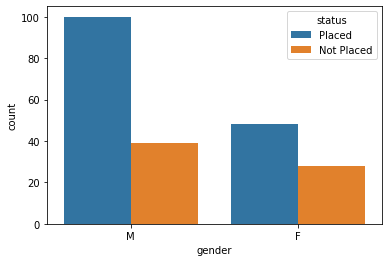

In [5]:
ax=sns.countplot(x='gender',hue='status',data=Data)

In [6]:
Data["Male"]=np.where(Data["gender"]=="M",1,0)
#Data["ho_rent"]=np.where(Data["Home.Ownership"]=="RENT",1,0)
Data=Data.drop(["gender"],1)


In [7]:
Data

,sl_no,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,Male
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,1
1,2,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,1
2,3,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,1
3,4,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,1
4,5,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0,1
211,212,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0,1
212,213,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,1
213,214,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0,0


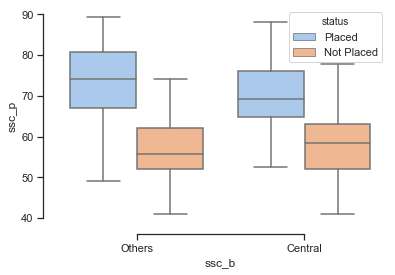

In [8]:
sns.set(style='ticks',palette='pastel')
sns.boxplot(x='ssc_b',y='ssc_p',hue='status',data=Data)
sns.despine(offset=10,trim=True)

In [9]:
Data['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

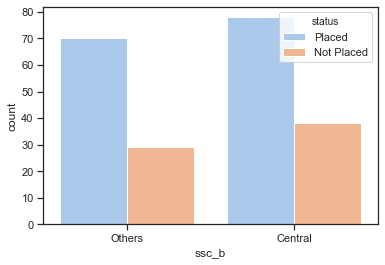

In [10]:
ax=sns.countplot(x='ssc_b',hue='status',data=Data)

In [11]:
Data["ssc_Central"]=np.where(Data["ssc_b"]=="Central",1,0)
#Data["ho_rent"]=np.where(Data["Home.Ownership"]=="RENT",1,0)
Data=Data.drop(["ssc_b"],1)


In [12]:
Data

,sl_no,ssc_p,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,Male,ssc_Central
0,1,67.00,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,1,0
1,2,79.33,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,1,1
2,3,65.00,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,1,1
3,4,56.00,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,1,1
4,5,85.80,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0,1,0
211,212,58.00,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0,1,0
212,213,67.00,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,1,0
213,214,74.00,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0,0,0


In [13]:
Data['hsc_b'].value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

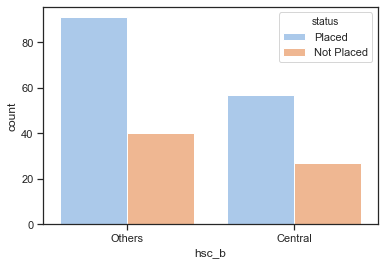

In [14]:
ax=sns.countplot(x='hsc_b',hue='status',data=Data)

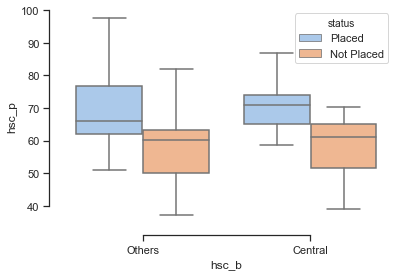

In [15]:
sns.set(style='ticks',palette='pastel')
sns.boxplot(x='hsc_b',y='hsc_p',hue='status',data=Data)
sns.despine(offset=10,trim=True)

In [16]:
Data["hsc_Central"]=np.where(Data["hsc_b"]=="Central",1,0)
#Data["ho_rent"]=np.where(Data["Home.Ownership"]=="RENT",1,0)
Data=Data.drop(["hsc_b"],1)


In [17]:
Data

,sl_no,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,Male,ssc_Central,hsc_Central
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,1,0,0
1,2,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,1,1,0
2,3,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,1,1,1
3,4,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,1,1,1
4,5,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0,1,0,0
211,212,58.00,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0,1,0,0
212,213,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,1,0,0
213,214,74.00,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0,0,0,0


In [18]:
Data['hsc_s'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

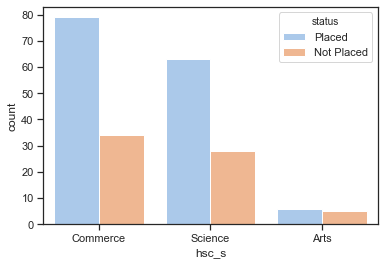

In [19]:
ax=sns.countplot(x='hsc_s',hue='status',data=Data)

In [20]:
Data["hsc_Commerce"]=np.where(Data["hsc_s"]=="Commerce",1,0)
Data["hsc_Science"]=np.where(Data["hsc_s"]=="Science",1,0)
Data=Data.drop(["hsc_s"],1)


In [21]:
Data

,sl_no,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,Male,ssc_Central,hsc_Central,hsc_Commerce,hsc_Science
0,1,67.00,91.00,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,1,0,0,1,0
1,2,79.33,78.33,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,1,1,0,0,1
2,3,65.00,68.00,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,1,1,1,0,0
3,4,56.00,52.00,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,1,1,1,0,1
4,5,85.80,73.60,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0,1,0,0,1,0
211,212,58.00,60.00,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0,1,0,0,0,1
212,213,67.00,67.00,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,1,0,0,1,0
213,214,74.00,66.00,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0,0,0,0,1,0


In [22]:
Data['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

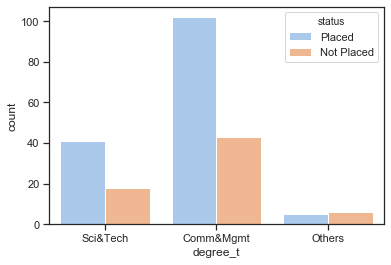

In [23]:
ax=sns.countplot(x='degree_t',hue='status',data=Data)

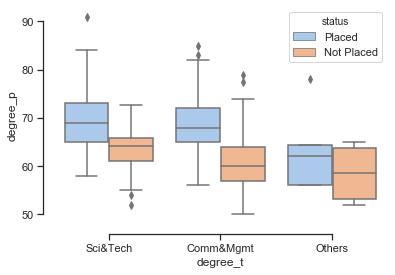

In [24]:
sns.set(style='ticks',palette='pastel')
sns.boxplot(x='degree_t',y='degree_p',hue='status',data=Data)
sns.despine(offset=10,trim=True)

In [25]:
Data["Dgree_Comm&Mgmt"]=np.where(Data["degree_t"]=="Comm&Mgmt",1,0)
Data["Degree_Sci&Tech"]=np.where(Data["degree_t"]=="Sci&Tech",1,0)
Data=Data.drop(["degree_t"],1)


In [26]:
Data

,sl_no,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,salary,Male,ssc_Central,hsc_Central,hsc_Commerce,hsc_Science,Dgree_Comm&Mgmt,Degree_Sci&Tech
0,1,67.00,91.00,58.00,No,55.0,Mkt&HR,58.80,Placed,270000.0,1,0,0,1,0,0,1
1,2,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,1,1,0,0,1,0,1
2,3,65.00,68.00,64.00,No,75.0,Mkt&Fin,57.80,Placed,250000.0,1,1,1,0,0,1,0
3,4,56.00,52.00,52.00,No,66.0,Mkt&HR,59.43,Not Placed,NaN,1,1,1,0,1,0,1
4,5,85.80,73.60,73.30,No,96.8,Mkt&Fin,55.50,Placed,425000.0,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,No,91.0,Mkt&Fin,74.49,Placed,400000.0,1,0,0,1,0,1,0
211,212,58.00,60.00,72.00,No,74.0,Mkt&Fin,53.62,Placed,275000.0,1,0,0,0,1,0,1
212,213,67.00,67.00,73.00,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,1,0,0,1,0,1,0
213,214,74.00,66.00,58.00,No,70.0,Mkt&HR,60.23,Placed,204000.0,0,0,0,1,0,1,0


In [27]:
Data['workex'].value_counts()

No     141
Yes     74
Name: workex, dtype: int64

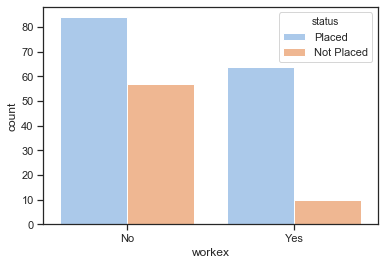

In [28]:
ax=sns.countplot(x='workex',hue='status',data=Data)

In [29]:
Data["Work_exp_yes"]=np.where(Data["workex"]=="Yes",1,0)

Data=Data.drop(["workex"],1)


In [30]:
Data

,sl_no,ssc_p,hsc_p,degree_p,etest_p,specialisation,mba_p,status,salary,Male,ssc_Central,hsc_Central,hsc_Commerce,hsc_Science,Dgree_Comm&Mgmt,Degree_Sci&Tech,Work_exp_yes
0,1,67.00,91.00,58.00,55.0,Mkt&HR,58.80,Placed,270000.0,1,0,0,1,0,0,1,0
1,2,79.33,78.33,77.48,86.5,Mkt&Fin,66.28,Placed,200000.0,1,1,0,0,1,0,1,1
2,3,65.00,68.00,64.00,75.0,Mkt&Fin,57.80,Placed,250000.0,1,1,1,0,0,1,0,0
3,4,56.00,52.00,52.00,66.0,Mkt&HR,59.43,Not Placed,NaN,1,1,1,0,1,0,1,0
4,5,85.80,73.60,73.30,96.8,Mkt&Fin,55.50,Placed,425000.0,1,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,Mkt&Fin,74.49,Placed,400000.0,1,0,0,1,0,1,0,0
211,212,58.00,60.00,72.00,74.0,Mkt&Fin,53.62,Placed,275000.0,1,0,0,0,1,0,1,0
212,213,67.00,67.00,73.00,59.0,Mkt&Fin,69.72,Placed,295000.0,1,0,0,1,0,1,0,1
213,214,74.00,66.00,58.00,70.0,Mkt&HR,60.23,Placed,204000.0,0,0,0,1,0,1,0,0


In [31]:
Data['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

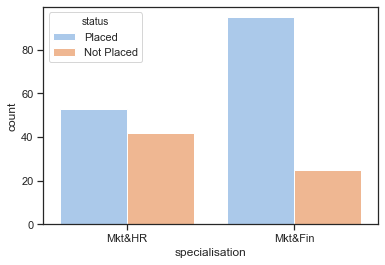

In [32]:
ax=sns.countplot(x='specialisation',hue='status',data=Data)

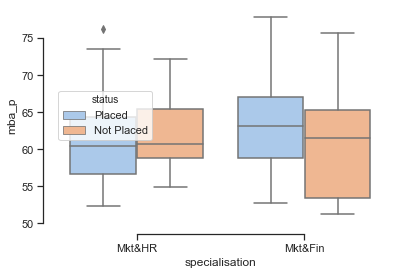

In [33]:
sns.set(style='ticks',palette='pastel')
sns.boxplot(x='specialisation',y='mba_p',hue='status',data=Data)
sns.despine(offset=10,trim=True)

In [34]:
Data["speci_Mkt&Fin"]=np.where(Data["specialisation"]=="Mkt&Fin",1,0)

Data=Data.drop(["specialisation"],1)


In [35]:
Data

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary,Male,ssc_Central,hsc_Central,hsc_Commerce,hsc_Science,Dgree_Comm&Mgmt,Degree_Sci&Tech,Work_exp_yes,speci_Mkt&Fin
0,1,67.00,91.00,58.00,55.0,58.80,Placed,270000.0,1,0,0,1,0,0,1,0,0
1,2,79.33,78.33,77.48,86.5,66.28,Placed,200000.0,1,1,0,0,1,0,1,1,1
2,3,65.00,68.00,64.00,75.0,57.80,Placed,250000.0,1,1,1,0,0,1,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,Not Placed,NaN,1,1,1,0,1,0,1,0,0
4,5,85.80,73.60,73.30,96.8,55.50,Placed,425000.0,1,1,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,Placed,400000.0,1,0,0,1,0,1,0,0,1
211,212,58.00,60.00,72.00,74.0,53.62,Placed,275000.0,1,0,0,0,1,0,1,0,1
212,213,67.00,67.00,73.00,59.0,69.72,Placed,295000.0,1,0,0,1,0,1,0,1,1
213,214,74.00,66.00,58.00,70.0,60.23,Placed,204000.0,0,0,0,1,0,1,0,0,0


In [36]:
Data['status']=np.where(Data['status']=='Placed',1,0)

In [37]:
Data=Data.drop(['salary'],1)

In [38]:
Data=Data.drop(['sl_no'],1)

In [39]:
Data.isnull().sum()

ssc_p              0
hsc_p              0
degree_p           0
etest_p            0
mba_p              0
status             0
Male               0
ssc_Central        0
hsc_Central        0
hsc_Commerce       0
hsc_Science        0
Dgree_Comm&Mgmt    0
Degree_Sci&Tech    0
Work_exp_yes       0
speci_Mkt&Fin      0
dtype: int64

In [40]:
ld_train, ld_test = train_test_split(Data, test_size = 0.2,random_state=2)

## Linear Model

In [41]:
lm=LinearRegression()

In [42]:
x_train=ld_train.drop(["status"],1)
y_train=ld_train["status"]
x_test=ld_test.drop(["status"],1)
y_test=ld_test["status"]

In [43]:
y_train

2      1
169    0
3      0
118    1
14     0
      ..
43     1
22     1
72     1
15     1
168    0
Name: status, Length: 172, dtype: int32

In [44]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
p_test=lm.predict(x_test)

residual=p_test-y_test

rmse_lm=np.sqrt(np.dot(residual,residual)/len(p_test))

rmse_lm

0.34968863688898466

In [46]:
coefs=lm.coef_

features=x_train.columns

list(zip(features,coefs))

[('ssc_p', 0.01701002281787739),
 ('hsc_p', 0.01145140788073699),
 ('degree_p', 0.015621122975841312),
 ('etest_p', -0.0023680230409677617),
 ('mba_p', -0.024191306982253705),
 ('Male', 0.04520446276893412),
 ('ssc_Central', -0.10740452467808245),
 ('hsc_Central', 0.043983941255739734),
 ('hsc_Commerce', -0.08092297106354135),
 ('hsc_Science', -0.008663164834356486),
 ('Dgree_Comm&Mgmt', 0.21030909301559397),
 ('Degree_Sci&Tech', 0.01898595937455443),
 ('Work_exp_yes', 0.20544722974139126),
 ('speci_Mkt&Fin', 0.05559880823973429)]

In [47]:
# Finding best value of penalty weight with cross validation for ridge regression
alphas=np.linspace(.0001,10,100)
# We need to reset index for cross validation to work without hitch
x_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [51]:
rmse_list=[]
for a in alphas:
    ridge = Ridge(fit_intercept=True, alpha=a)

    # computing average RMSE across 10-fold cross validation
    kf= KFold(10 ,random_state=False,shuffle=True)
    xval_err = 0
    for train, test in kf.split(x_train):
        ridge.fit(x_train.loc[train], y_train[train])
        p = ridge.predict(x_train.loc[test])
        err = p - y_train[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(x_train))
    # uncomment below to print rmse values for individidual alphas
#     print('{:.3f}\t {:.6f}\t '.format(a,rmse_10cv))
    rmse_list.extend([rmse_10cv])
best_alpha=alphas[rmse_list==min(rmse_list)]
print('Alpha with min 10cv error is : ',best_alpha )

Alpha with min 10cv error is :  [1.]


In [53]:
ridge=Ridge(fit_intercept=True,alpha=best_alpha)

ridge.fit(x_train,y_train)

p_test=ridge.predict(x_test)

residual=p_test-y_test

rmse_ridge=np.sqrt(np.dot(residual,residual)/len(p_test))

rmse_ridge

0.34821683740572934

In [54]:
list(zip(x_train.columns,ridge.coef_))

[('ssc_p', 0.01702955748092826),
 ('hsc_p', 0.011392395897768602),
 ('degree_p', 0.015868504971364997),
 ('etest_p', -0.002406556210180294),
 ('mba_p', -0.024084044999759458),
 ('Male', 0.045279041535391404),
 ('ssc_Central', -0.09966391666857238),
 ('hsc_Central', 0.03763595238363098),
 ('hsc_Commerce', -0.06764289371851635),
 ('hsc_Science', -0.0006527839422721776),
 ('Dgree_Comm&Mgmt', 0.18020447897687814),
 ('Degree_Sci&Tech', -0.005829128893849804),
 ('Work_exp_yes', 0.1982831705439974),
 ('speci_Mkt&Fin', 0.05667394964062923)]

In [56]:
alphas=np.linspace(0.0001,1,100)
rmse_list=[]
for a in alphas:
    lasso = Lasso(fit_intercept=True, alpha=a,max_iter=10000)

    # computing RMSE using 10-fold cross validation
    kf= KFold(10 ,random_state=False,shuffle=True)
    xval_err = 0
    for train, test in kf.split(x_train):
        lasso.fit(x_train.loc[train], y_train[train])
        p =lasso.predict(x_train.loc[test])
        err = p - y_train[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(x_train))
    rmse_list.extend([rmse_10cv])
    # Uncomment below to print rmse values of individual alphas
    print('{:.3f}\t {:.4f}\t '.format(a,rmse_10cv))
best_alpha=alphas[rmse_list==min(rmse_list)]
print('Alpha with min 10cv error is : ',best_alpha )

0.000	 0.3298	 
0.010	 0.3276	 
0.020	 0.3326	 
0.030	 0.3385	 
0.041	 0.3406	 
0.051	 0.3408	 
0.061	 0.3410	 
0.071	 0.3412	 
0.081	 0.3414	 
0.091	 0.3416	 
0.101	 0.3419	 
0.111	 0.3422	 
0.121	 0.3425	 
0.131	 0.3428	 
0.141	 0.3432	 
0.152	 0.3436	 
0.162	 0.3440	 
0.172	 0.3445	 
0.182	 0.3449	 
0.192	 0.3453	 
0.202	 0.3458	 
0.212	 0.3463	 
0.222	 0.3469	 
0.232	 0.3474	 
0.242	 0.3480	 
0.253	 0.3487	 
0.263	 0.3493	 
0.273	 0.3500	 
0.283	 0.3507	 
0.293	 0.3514	 
0.303	 0.3522	 
0.313	 0.3530	 
0.323	 0.3539	 
0.333	 0.3548	 
0.343	 0.3557	 
0.354	 0.3566	 
0.364	 0.3576	 
0.374	 0.3586	 
0.384	 0.3596	 
0.394	 0.3606	 
0.404	 0.3614	 
0.414	 0.3623	 
0.424	 0.3631	 
0.434	 0.3640	 
0.444	 0.3648	 
0.455	 0.3654	 
0.465	 0.3660	 
0.475	 0.3663	 
0.485	 0.3666	 
0.495	 0.3669	 
0.505	 0.3672	 
0.515	 0.3675	 
0.525	 0.3678	 
0.535	 0.3681	 
0.545	 0.3685	 
0.556	 0.3688	 
0.566	 0.3691	 
0.576	 0.3695	 
0.586	 0.3698	 
0.596	 0.3702	 
0.606	 0.3705	 
0.616	 0.3709	 
0.626	 0

In [58]:
lasso=Lasso(fit_intercept=True,alpha=best_alpha)

lasso.fit(x_train,y_train)

p_test=lasso.predict(x_test)

residual=p_test-y_test

rmse_lasso=np.sqrt(np.dot(residual,residual)/len(p_test))

rmse_lasso

0.34560250113909885

In [60]:
list(zip(x_train.columns,lasso.coef_))

[('ssc_p', 0.017404387017273565),
 ('hsc_p', 0.010765979140769695),
 ('degree_p', 0.016352365604181258),
 ('etest_p', -0.0019424299767528588),
 ('mba_p', -0.024377135812519695),
 ('Male', 0.0),
 ('ssc_Central', -0.029038844318563947),
 ('hsc_Central', -0.0),
 ('hsc_Commerce', -0.0),
 ('hsc_Science', 0.0),
 ('Dgree_Comm&Mgmt', 0.09492897860741749),
 ('Degree_Sci&Tech', -0.0),
 ('Work_exp_yes', 0.15372455383643024),
 ('speci_Mkt&Fin', 0.03294974611599857)]

In [61]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

x, y = make_regression(n_features=2, random_state=0)
regr = ElasticNet(random_state=0)
regr.fit(x, y)
ElasticNet(random_state=0)
print(regr.coef_)

print(regr.intercept_)

print(regr.predict([[0, 0]]))


[18.83816048 64.55968825]
1.4512607561654027
[1.45126076]


In [63]:
Data.columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'status', 'Male',
       'ssc_Central', 'hsc_Central', 'hsc_Commerce', 'hsc_Science',
       'Dgree_Comm&Mgmt', 'Degree_Sci&Tech', 'Work_exp_yes', 'speci_Mkt&Fin'],
      dtype='object')

In [72]:
#performance metrics for linear regression
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, p_test))
print(metrics.mean_squared_error(y_test, p_test))
print(np.sqrt(metrics.mean_squared_error(y_test,p_test)))

0.28283353003152045
0.11944108879360082
0.34560250113909885


### Grid Search CV

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

In [74]:
abreg = AdaBoostRegressor()

In [75]:
params = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }

In [76]:
score = make_scorer(mean_squared_error)

In [77]:
gridsearch=GridSearchCV(abreg, params, cv=5, return_train_score=True)
gridsearch.fit(x, y)
GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, 
       loss='linear', n_estimators=50, random_state=None),
        iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100], 
                   'learning_rate': [0.01, 0.05, 0.1, 0.5], 
                   'loss': ['linear', 'square', 'exponential']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0) 

GridSearchCV(cv=5, error_score='raise',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid=True, n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [78]:
print(gridsearch.best_params_)
{'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 50}

print(gridsearch.best_score_)

{'learning_rate': 0.5, 'loss': 'square', 'n_estimators': 100}
0.9217681676811058


In [79]:
best_estim=gridsearch.best_estimator_
print(best_estim)
AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='exponential',
         n_estimators=50, random_state=None)


AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='square',
                  n_estimators=100, random_state=None)


AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='exponential',
                  n_estimators=50, random_state=None)

In [81]:
best_estim.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='square',
                  n_estimators=100, random_state=None)

In [83]:
ytr_pred=best_estim.predict(x_train)
mse = mean_squared_error(ytr_pred,y_train)
r2 = r2_score(ytr_pred,y_train)
print("MSE: %.2f" % mse)

print("R2: %.2f" % r2)

MSE: 0.06
R2: 0.23


In [85]:
ypred=best_estim.predict(x_test)
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)
print("MSE: %.2f" % mse)

print("R2: %.2f" % r2)

MSE: 0.13
R2: 0.37


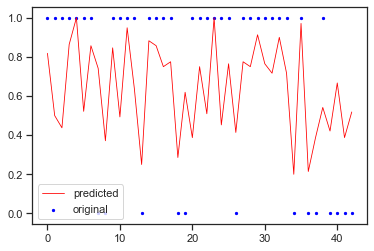

In [86]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

### Normalization and Standarization

In [87]:
from sklearn import preprocessing

### Logistic Model

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [95]:
logr=LogisticRegression(penalty="l1",class_weight="balanced",random_state=2)

In [96]:
logr.fit(x_train,y_train)

C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=2, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
# score model performance on the test data
roc_auc_score(y_test,logr.predict(x_test))

0.8128205128205128

In [98]:
prob_score=pd.Series(list(zip(*logr.predict_proba(x_train)))[1])

In [99]:
cutoffs=np.linspace(0,1,100)

In [100]:
KS_cut=[]
for cutoff in cutoffs:
    predicted=pd.Series([0]*len(y_train))
    predicted[prob_score>cutoff]=1
    df=pd.DataFrame(list(zip(y_train,predicted)),columns=["real","predicted"])
    TP=len(df[(df["real"]==1) &(df["predicted"]==1) ])
    FP=len(df[(df["real"]==0) &(df["predicted"]==1) ])
    TN=len(df[(df["real"]==0) &(df["predicted"]==0) ])
    FN=len(df[(df["real"]==1) &(df["predicted"]==0) ])
    P=TP+FN
    N=TN+FP
    KS=(TP/P)-(FP/N)
    KS_cut.append(KS)

cutoff_data=pd.DataFrame(list(zip(cutoffs,KS_cut)),columns=["cutoff","KS"])

KS_cutoff=cutoff_data[cutoff_data["KS"]==cutoff_data["KS"].max()]["cutoff"]

In [101]:
# Performance on test data
prob_score_test=pd.Series(list(zip(*logr.predict_proba(x_test)))[1])

predicted_test=pd.Series([0]*len(y_test))
predicted_test[prob_score_test>float(KS_cutoff)]=1

df_test=pd.DataFrame(list(zip(y_test,predicted_test)),columns=["real","predicted"])

k=pd.crosstab(df_test['real'],df_test["predicted"])
print('confusion matrix :\n \n ',k)
TN=k.iloc[0,0]
TP=k.iloc[1,1]
FP=k.iloc[0,1]
FN=k.iloc[1,0]
P=TP+FN
N=TN+FP

confusion matrix :
 
  predicted  0   1
real            
0          9   4
1          2  28


In [102]:
# Accuracy of test
(TP+TN)/(P+N)

0.8604651162790697

In [103]:
# Sensitivity on test
TP/P

0.9333333333333333

In [104]:
#Specificity on test
TN/N

0.6923076923076923

In [109]:
cutoffs=np.linspace(0.010,0.99,100)
def Fbeta_perf(beta,cutoffs,y_train,prob_score):
    FB_cut=[]
    for cutoff in cutoffs:
        predicted=pd.Series([0]*len(y_train))
        predicted[prob_score>cutoff]=1
        df=pd.DataFrame(list(zip(y_train,predicted)),columns=["real","predicted"])

        TP=len(df[(df["real"]==1) &(df["predicted"]==1) ])
        FP=len(df[(df["real"]==0) &(df["predicted"]==1) ])
        FN=len(df[(df["real"]==1) &(df["predicted"]==0) ])
        P=TP+FN
        
        
        Precision=TP/(TP+FP)
        Recall=TP/P
        FB=(1+beta**2)*Precision*Recall/((beta**2)*Precision+Recall)
        FB_cut.append(FB)

    cutoff_data=pd.DataFrame(list(zip(cutoffs,FB_cut)),columns=["cutoff","FB"])

    FB_cutoff=cutoff_data[cutoff_data["FB"]==cutoff_data["FB"].max()]["cutoff"]

    prob_score_test=pd.Series(list(zip(*logr.predict_proba(x_test)))[1])

    predicted_test=pd.Series([0]*len(y_test))
    predicted_test[prob_score_test>float(FB_cutoff)]=1

    df_test=pd.DataFrame(list(zip(y_test,predicted_test)),columns=["real","predicted"])

    k=pd.crosstab(df_test['real'],df_test["predicted"])
    print('confusion matrix :\n \n ',k)
    TN=k.iloc[0,0]
    TP=k.iloc[1,1]
    FP=k.iloc[0,1]
    FN=k.iloc[1,0]
    P=TP+FN
    N=TN+FP
    print('For beta :',beta)
    print('Accuracy is :',(TP+TN)/(P+N))
    print('Sensitivity is :',(TP/P))
    print('Specificity is :',(TN/N))
    print('\n \n \n')

In [110]:
Fbeta_perf(0.5,cutoffs,y_train,prob_score)
Fbeta_perf(1,cutoffs,y_train,prob_score)
Fbeta_perf(2,cutoffs,y_train,prob_score)

TypeError: cannot convert the series to <class 'float'>

## Dicision Tree and Random Forest

In [112]:
from sklearn import tree

from sklearn.model_selection import KFold

In [113]:
# creating a decision tree class object
dtree=tree.DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=10,
                                  class_weight="balanced")

In [114]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [115]:
predicted=dtree.predict(x_test)

df_test=pd.DataFrame(list(zip(y_test,predicted)),columns=["real","predicted"])

k=pd.crosstab(df_test['real'],df_test["predicted"])


In [116]:
TP=k.iloc[1,1]
TN=k.iloc[0,0]
FP=k.iloc[0,1]
FN=k.iloc[1,0]
P=TP+FN
N=TN+FP


print('Accuracy is :',(TP+TN)/(P+N))
print('Sensitivity is :',TP/P)
print('Specificity is :',TN/N)


Accuracy is : 0.7674418604651163
Sensitivity is : 0.9
Specificity is : 0.46153846153846156


In [117]:
max_nodes=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
max_nodes

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [123]:
beta=2
FB_avg=[]
for max_node  in max_nodes:
    mytree = tree.DecisionTreeClassifier(criterion="entropy",
                                         max_leaf_nodes=max_node,class_weight="balanced")

    # computing average RMSE across 10-fold cross validation
    kf= KFold(10 ,random_state=False,shuffle=True)
    FB_total = []
    for train, test in kf.split(x_train):
        mytree.fit(x_train.loc[train], y_train[train])
        p = mytree.predict(x_train.loc[test])
        df=pd.DataFrame(list(zip(y_train,p)),columns=["real","predicted"])
        TP=len(df[(df["real"]==1) &(df["predicted"]==1) ])
        FP=len(df[(df["real"]==0) &(df["predicted"]==1) ])
        TN=len(df[(df["real"]==0) &(df["predicted"]==0) ])
        FN=len(df[(df["real"]==1) &(df["predicted"]==0) ])
        P=TP+FN
        N=TN+FP
        Precision=TP/(TP+FP)
        Recall=TP/P
        FB=(1+beta**2)*Precision*Recall/((beta**2)*Precision+Recall)
        FB_total.extend([FB])
    FB_avg.extend([np.mean(FB_total)])
best_max_node=np.array(max_nodes)[FB_avg==max(FB_avg)][0]

print('max_node value with best F2 score is :',best_max_node)

max_node value with best F2 score is : 12


In [124]:
dtree=tree.DecisionTreeClassifier(criterion="entropy",
                                  max_leaf_nodes=best_max_node,class_weight="balanced")
dtree.fit(x_train,y_train)
predicted=dtree.predict(x_test)

df_test=pd.DataFrame(list(zip(y_test,predicted)),columns=["real","predicted"])

k=pd.crosstab(df_test['real'],df_test["predicted"])
print(k)

predicted  0   1
real            
0          6   7
1          3  27


In [125]:
TP=k.iloc[1,1]
TN=k.iloc[0,0]
FP=k.iloc[0,1]
FN=k.iloc[1,0]
P=TP+FN
N=TN+FP

print(TP,TN,FP,FN)
print('Accuracy is :',(TP+TN)/(P+N))
print('Sensitivity is :',TP/P)
print('Specificity is :',TN/N)

27 6 7 3
Accuracy is : 0.7674418604651163
Sensitivity is : 0.9
Specificity is : 0.46153846153846156


In [126]:
from sklearn.ensemble import RandomForestClassifier
# help(RandomForestClassifier)

In [130]:
import numpy as np

from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint

from sklearn.model_selection import RandomizedSearchCV


clf = RandomForestClassifier(verbose=1,n_jobs=-1)
# this here is the base classifier we are going to try
# we will be supplying different parameter ranges to our randomSearchCV which in turn
# will pass it on to this classifier

# Utility function to report best scores. This simply accepts grid scores from 
# our randomSearchCV/GridSearchCV and picks and gives top few combination according to 
# their scores

def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    # above line selects top n grid scores
    # for loop below , prints the rank, score and parameter combination
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")
    
# RandomSearchCV/GridSearchCV accept parameters values as dictionaries.
# In example given below we have constructed dictionary for 
#different parameter values that we want to
# try for randomForest model
param_dist = {"n_estimators":[10,100,500,700],
              "max_depth": [3,5, None],
              "max_features": sp_randint(5, 11),
              "min_samples_split": sp_randint(5, 11),
              "min_samples_leaf": sp_randint(5, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
# run randomized search
n_iter_search = 100
# n_iter parameter of RandomizedSeacrhCV controls, how many 
# parameter combination will be tried; out of all possible given values

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)
random_search.fit(x_train, y_train)
print(getattr(random_search, 'grid_scores_', None))
report(random_search.grid_scores_)

C:\Users\somya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks    

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend Lok

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s rema

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend Lok

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]:

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[P

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend Lok

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend Lok

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.2s fini

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend Lok

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend Lok

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\somya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


None


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [133]:
random_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 7,
 'min_samples_split': 6,
 'n_estimators': 100}

In [140]:
random_search.best_score_

0.872093023255814

In [141]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

In [144]:
random_search.cv_results_

{'mean_fit_time': array([0.56280088, 0.03556657, 0.03523819, 0.4089036 , 0.04487769,
        0.81446711, 0.50495744, 0.11967874, 0.37532663, 0.67220195,
        0.09972191, 1.67277034, 0.50863989, 0.05332565, 0.41819612,
        1.80076925, 0.10504882, 0.09173934, 0.5212582 , 0.03424048,
        0.53887272, 0.09273871, 0.09273632, 0.36169314, 0.36233608,
        0.04486394, 0.5126218 , 0.03821437, 0.55050063, 0.03488119,
        0.52757255, 0.09337481, 0.08973217, 0.53056717, 0.51926327,
        0.53320765, 0.09440621, 0.39195029, 0.04585234, 0.10967962,
        0.03986724, 0.25340056, 0.10438617, 0.02855253, 0.36301653,
        0.15323957, 0.57909385, 0.03055708, 0.40489419, 0.04222099,
        0.37729279, 0.03886414, 0.3593421 , 3.32871946, 0.53124221,
        0.03454558, 0.51329247, 0.5837733 , 0.09773302, 0.03655799,
        0.36901164, 0.03256154, 0.03822533, 0.36768627, 0.54287974,
        0.41921186, 0.13429077, 0.55618064, 0.41987459, 0.53188475,
        0.08941166, 0.02924212,

In [145]:
rf=RandomForestClassifier(n_estimators=500,verbose=1,criterion='entropy',min_samples_split=7,
                         bootstrap=False,max_depth=None,max_features=8,min_samples_leaf=5,
                          class_weight="balanced")

In [146]:
rf.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.0s finished


RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=8,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=False,
                       random_state=None, verbose=1, warm_start=False)

In [147]:
predicted=rf.predict(x_test)

df_test=pd.DataFrame(list(zip(y_test,predicted)),columns=["real","predicted"])

k=pd.crosstab(df_test['real'],df_test["predicted"])
print(k)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


predicted  0   1
real            
0          6   7
1          4  26


In [148]:
TP=k.iloc[1,1]
TN=k.iloc[0,0]
FP=k.iloc[0,1]
FN=k.iloc[1,0]
P=TP+FN
N=TN+FP

print(TP,TN,FP,FN)
print('Accuracy is :',(TP+TN)/(P+N))
print('Sensitivity is :',TP/P)
print('Specificity is :',TN/N)

26 6 7 4
Accuracy is : 0.7441860465116279
Sensitivity is : 0.8666666666666667
Specificity is : 0.46153846153846156


Feature ranking:
1. feature ssc_p (0.280213)
2. feature hsc_p (0.237954)
3. feature degree_p (0.232361)
4. feature etest_p (0.117392)
5. feature mba_p (0.042534)
6. feature Male (0.024513)
7. feature ssc_Central (0.022394)
8. feature hsc_Central (0.011321)
9. feature hsc_Commerce (0.008940)
10. feature hsc_Science (0.007403)
11. feature Dgree_Comm&Mgmt (0.006674)
12. feature Degree_Sci&Tech (0.004343)
13. feature Work_exp_yes (0.003507)
14. feature speci_Mkt&Fin (0.000451)


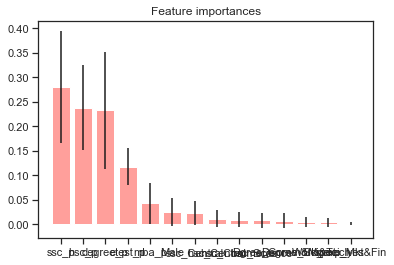

In [149]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, list(x_train.columns)[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), list(x_train.columns))
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [150]:
# We'll  do this for variable Average Credit Card Transaction
# You can try to generalise the process and even write a function if you want

data=x_train.copy()

features=x_train.columns

for f in features:
    if f=='Average Credit Card Transaction':pass
    else:
        data[f]=data[f].mean()

data=data.drop_duplicates()
data['response']=pd.Series(list(zip(*rf.predict_proba(x_train)))[1])


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


In [151]:
from ggplot import *
ggplot(data,aes(x='Average Credit Card Transaction',y='response'))+\
geom_smooth(se=False,span=0.2)+xlab("Average Credit Card Transaction")+\
ylab('Response')+\
ggtitle('Partial Dependence Plot \n Response Vs Average Credit Card transactions')

AttributeError: module 'pandas' has no attribute 'tslib'

## Boosting Machines

In [152]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

In [154]:
gbm_params={'n_estimators':[50,100,200,500,700],
           'learning_rate': [0.01,.05,0.1,0.4,0.8,1],
            'max_depth':[1,2,3,4,5,6],
             'min_samples_split':[2,5,10,20],
             'min_samples_leaf':[2,5,10,20],
            'subsample':[0.5,0.8,1],
            'max_features':[5,10,15,20,30,45]
           }


In [155]:
gbm=GradientBoostingClassifier()

In [156]:
random_search1=RandomizedSearchCV(gbm,scoring='roc_auc',param_distributions=gbm_params,
                                 cv=5,n_iter=10,
                                 n_jobs=-1)

In [157]:
random_search.fit(x_train,y_train)
# this might take upto 30-45 miins to finish , if you try cv=10 and larger number for n_iter
# ( dont be impatient :) . Also dont be alarmed if it finishes early :))

C:\Users\somya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   34.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 1

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend wit

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend Lok

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend Lok

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0

[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_

[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 t

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 7

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend Lok

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 50

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s rema

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs

In [158]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [159]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.872 (std: 0.03666)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 100}

Model with rank: 1
Mean validation score: 0.872 (std: 0.03347)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 7, 'min_samples_split': 7, 'n_estimators': 10}

Model with rank: 1
Mean validation score: 0.872 (std: 0.02255)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 7, 'min_samples_split': 7, 'n_estimators': 100}

Model with rank: 1
Mean validation score: 0.872 (std: 0.03666)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 500}

Model with rank: 5
Mean validation score: 0.866 (std: 0.03389)
Parameters: {'bootstrap': True,

### XgBoost

In [160]:
xgb_params = {  
                "learning_rate":[0.01,0.05,0.1,0.3,0.5],
                "gamma":[i/10.0 for i in range(0,5)],
                "max_depth": [2,3,4,5,6,7,8],
                "min_child_weight":[1,2,5,10],
                "max_delta_step":[0,1,2,5,10],
                "subsample":[i/10.0 for i in range(5,10)],
                "colsample_bytree":[i/10.0 for i in range(5,10)],
                "colsample_bylevel":[i/10.0 for i in range(5,10)],
                "reg_lambda":[1e-5, 1e-2, 0.1, 1, 100], 
                "reg_alpha":[1e-5, 1e-2, 0.1, 1, 100],
                "scale_pos_weight":[1,2,3,4,5,6,7,8,9],
                "n_estimators":[100,500,700,1000]
             }


In [161]:
xgb=XGBClassifier(objective='binary:logistic')

In [162]:
n_iter=10

random_search2=RandomizedSearchCV(xgb,n_jobs=-1,cv=5,n_iter=n_iter,scoring='roc_auc',
                                 param_distributions=xgb_params)

In [163]:
random_search2.fit(x_train,y_train)

C:\Users\somya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_co...
                                        'max_delta_step': [0, 1, 2, 5, 10],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 2, 5, 10

In [164]:
report(random_search2.cv_results_,5)

Model with rank: 1
Mean validation score: 0.915 (std: 0.03531)
Parameters: {'subsample': 0.5, 'scale_pos_weight': 9, 'reg_lambda': 0.1, 'reg_alpha': 1, 'n_estimators': 700, 'min_child_weight': 1, 'max_depth': 5, 'max_delta_step': 5, 'learning_rate': 0.3, 'gamma': 0.4, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5}

Model with rank: 2
Mean validation score: 0.914 (std: 0.04065)
Parameters: {'subsample': 0.9, 'scale_pos_weight': 9, 'reg_lambda': 1e-05, 'reg_alpha': 0.01, 'n_estimators': 1000, 'min_child_weight': 2, 'max_depth': 8, 'max_delta_step': 10, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.8}

Model with rank: 3
Mean validation score: 0.913 (std: 0.02819)
Parameters: {'subsample': 0.5, 'scale_pos_weight': 8, 'reg_lambda': 0.1, 'reg_alpha': 0.01, 'n_estimators': 1000, 'min_child_weight': 5, 'max_depth': 3, 'max_delta_step': 1, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.7}

Model with rank: 4
Mean 

In [165]:
random_search2.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=5, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=700, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=1,
              reg_lambda=0.1, scale_pos_weight=9, subsample=0.5,
              tree_method=None, validate_parameters=False, verbosity=None)

### Sequential Parameter Tuning

In [166]:
xgb_params = {  
                "n_estimators":[100,500,700,900,1000,1200,1500]
             }

In [167]:
xgb1=XGBClassifier(learning_rate=0.1,subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)

In [168]:
from sklearn.model_selection import GridSearchCV

In [169]:
grid_search=GridSearchCV(xgb1,cv=5,param_grid=xgb_params,scoring='roc_auc',verbose=2,n_jobs=-1)

In [170]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    4.1s finished
C:\Users\somya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=0.8,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsampl

In [171]:
report(grid_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.911 (std: 0.03676)
Parameters: {'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.906 (std: 0.03165)
Parameters: {'n_estimators': 500}

Model with rank: 3
Mean validation score: 0.902 (std: 0.03485)
Parameters: {'n_estimators': 700}



In [172]:
xgb_params={
            "gamma":[0,2,5,8,10],
            "max_depth": [2,3,4,5,6,7,8],
            "min_child_weight":[0.5,1,2,5,10]
            }

In [173]:
xgb2=XGBClassifier(learning_rate=0.1,n_estimators=500,subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)

In [174]:
random_search=RandomizedSearchCV(xgb2,param_distributions=xgb_params,n_iter=20,cv=5,scoring='roc_auc',
                                 n_jobs=-1,verbose=2)

In [175]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.1s finished
C:\Users\somya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=0.8,
                                           colsample_bynode=None,
                                           colsample_bytree=0.8, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.1,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_const...
                                           reg_lambda=None,
                                           scale_pos_weight=None, subsample=0.8,
                                           tree_method=None,
                      

In [176]:
report(random_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.920 (std: 0.04273)
Parameters: {'min_child_weight': 0.5, 'max_depth': 2, 'gamma': 2}

Model with rank: 2
Mean validation score: 0.911 (std: 0.04024)
Parameters: {'min_child_weight': 2, 'max_depth': 7, 'gamma': 5}

Model with rank: 2
Mean validation score: 0.911 (std: 0.04024)
Parameters: {'min_child_weight': 2, 'max_depth': 4, 'gamma': 5}



In [177]:
y_train.value_counts()

1    118
0     54
Name: status, dtype: int64

In [178]:
118/54

2.185185185185185

In [179]:
xgb_params={
            'max_delta_step':[0,1,3,6,10],
            'scale_pos_weight':[1,2,3,4]
            }

In [180]:
xgb3=XGBClassifier(learning_rate=0.1,n_estimators=500,min_child_weight=1,gamma=0,max_depth=3,
                  subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)

In [181]:
grid_search=GridSearchCV(xgb3,param_grid=xgb_params,cv=5,scoring='roc_auc',n_jobs=-1,verbose=10)

In [182]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=0.8,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_e...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=0.8, tree_method=None

In [183]:
report(grid_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.910 (std: 0.04029)
Parameters: {'max_delta_step': 1, 'scale_pos_weight': 1}

Model with rank: 2
Mean validation score: 0.909 (std: 0.03789)
Parameters: {'max_delta_step': 0, 'scale_pos_weight': 1}

Model with rank: 2
Mean validation score: 0.909 (std: 0.03789)
Parameters: {'max_delta_step': 3, 'scale_pos_weight': 1}

Model with rank: 2
Mean validation score: 0.909 (std: 0.03789)
Parameters: {'max_delta_step': 6, 'scale_pos_weight': 1}

Model with rank: 2
Mean validation score: 0.909 (std: 0.03789)
Parameters: {'max_delta_step': 10, 'scale_pos_weight': 1}



In [184]:
xgb_params={
            'subsample':[i/10 for i in range(5,11)],
            'colsample_bytree':[i/10 for i in range(5,11)],
            'colsample_bylevel':[i/10 for i in range(5,11)]
            }

In [185]:
xgb4=XGBClassifier(learning_rate=0.1,n_estimators=500,min_child_weight=1,gamma=0,max_depth=3,
                        scale_pos_weight=1,max_delta_step=0
                  )

In [186]:
random_search=RandomizedSearchCV(xgb4,param_distributions=xgb_params,cv=5,n_iter=20,scoring='roc_auc',
                                n_jobs=-1,verbose=20)

In [187]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=0,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=nan,
                                           monotone_constraints=Non...
                                           subsample=None, tree_method=None,
                                           validate_parameters=False,
                                           verbosity=None),
                 

In [188]:
report(random_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.914 (std: 0.03866)
Parameters: {'subsample': 0.9, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.7}

Model with rank: 2
Mean validation score: 0.913 (std: 0.03207)
Parameters: {'subsample': 0.5, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.8}

Model with rank: 3
Mean validation score: 0.909 (std: 0.03227)
Parameters: {'subsample': 0.6, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5}



In [189]:
xgb5=XGBClassifier(learning_rate=0.1,n_estimators=500,min_child_weight=1,gamma=0,max_depth=3,
                        scale_pos_weight=1,max_delta_step=0,
                   colsample_bylevel= 0.5, colsample_bytree= 0.6, subsample= 1.0
                  )

In [190]:
xgb_params={
            'reg_lambda':[i/10 for i in range(0,50)],
            'reg_alpha':[i/10 for i in range(0,50)]
            }

In [191]:
random_search=RandomizedSearchCV(xgb5,param_distributions=xgb_params,cv=5,n_iter=20,scoring='roc_auc',
                                n_jobs=-1,verbose=10)

In [192]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.6s finished
C:\Users\somya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change nu

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=0.5,
                                           colsample_bynode=None,
                                           colsample_bytree=0.6, gamma=0,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=nan,
                                           monotone_constraints=None,...
                                                      0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0, 1.1, 1.2, 1.3, 1.4,
                                                      1.5, 1.6, 1.

In [193]:
report(random_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.925 (std: 0.03988)
Parameters: {'reg_lambda': 4.8, 'reg_alpha': 1.2}

Model with rank: 2
Mean validation score: 0.925 (std: 0.04478)
Parameters: {'reg_lambda': 1.9, 'reg_alpha': 1.0}

Model with rank: 3
Mean validation score: 0.924 (std: 0.04076)
Parameters: {'reg_lambda': 3.9, 'reg_alpha': 2.6}



In [194]:
xgb6=XGBClassifier(learning_rate=0.1,n_estimators=500,min_child_weight=1,gamma=0,max_depth=3,
                        scale_pos_weight=1,max_delta_step=0,
                   colsample_bylevel= 0.5, colsample_bytree= 0.6, subsample= 1.0,
                  reg_lambda=1,reg_alpha=0)

In [195]:
from sklearn.model_selection import cross_val_score

In [196]:
cross_val_score(xgb6,x_train,y_train,scoring='roc_auc',verbose=10,n_jobs=-1,cv=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


array([0.91666667, 0.875     , 0.97222222, 0.95833333, 0.81666667,
       0.95      , 0.96666667, 1.        , 0.85454545, 0.90909091])

In [197]:
scores=[0.92951477, 0.92590096, 0.93070889, 0.92176974, 0.92882013,
       0.93128318, 0.93018259, 0.93297173, 0.93256565, 0.92947388]

In [198]:
np.mean(scores)

0.929319152

In [199]:
np.std(scores)

0.0031528442142034264